Epoch 1/10


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8601 - loss: 0.4767 - val_accuracy: 0.9609 - val_loss: 0.1251
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9700 - loss: 0.0965 - val_accuracy: 0.9732 - val_loss: 0.0874
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9818 - loss: 0.0570 - val_accuracy: 0.9720 - val_loss: 0.0939
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9871 - loss: 0.0403 - val_accuracy: 0.9742 - val_loss: 0.0849
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9900 - loss: 0.0308 - val_accuracy: 0.9748 - val_loss: 0.0906
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9927 - loss: 0.0222 - val_accuracy: 0.9730 - val_loss: 0.0941
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9946 - loss: 0.0180 - val_accuracy: 0.9707 - val_loss: 0.1130
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9931 - loss: 0.0184 - val_accuracy: 0.9756 - val_

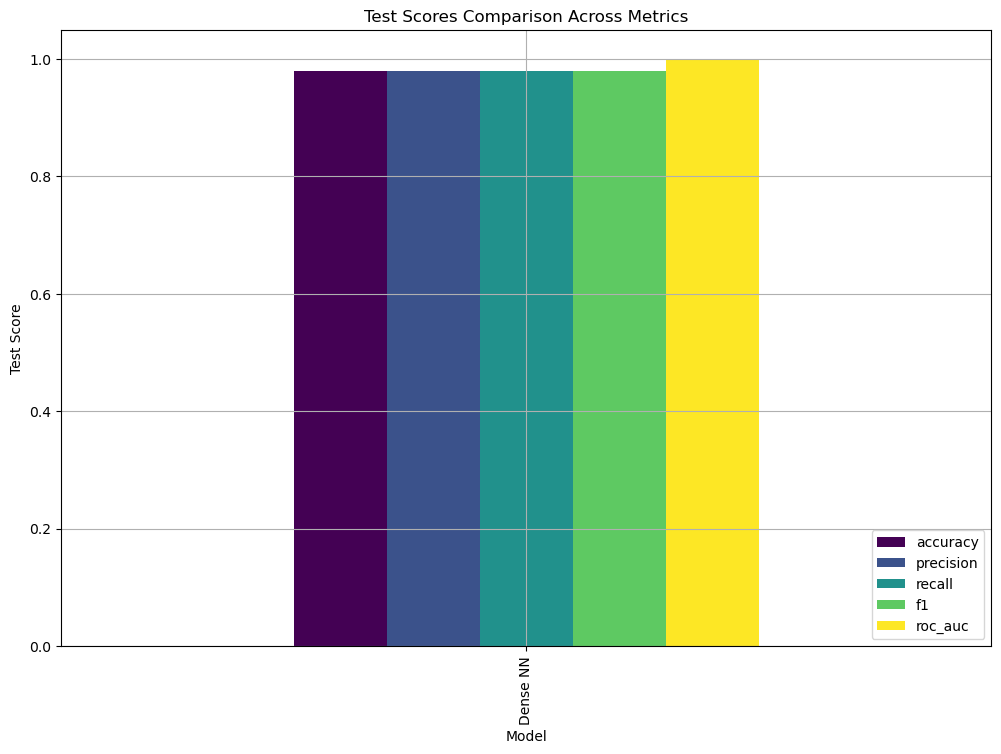

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


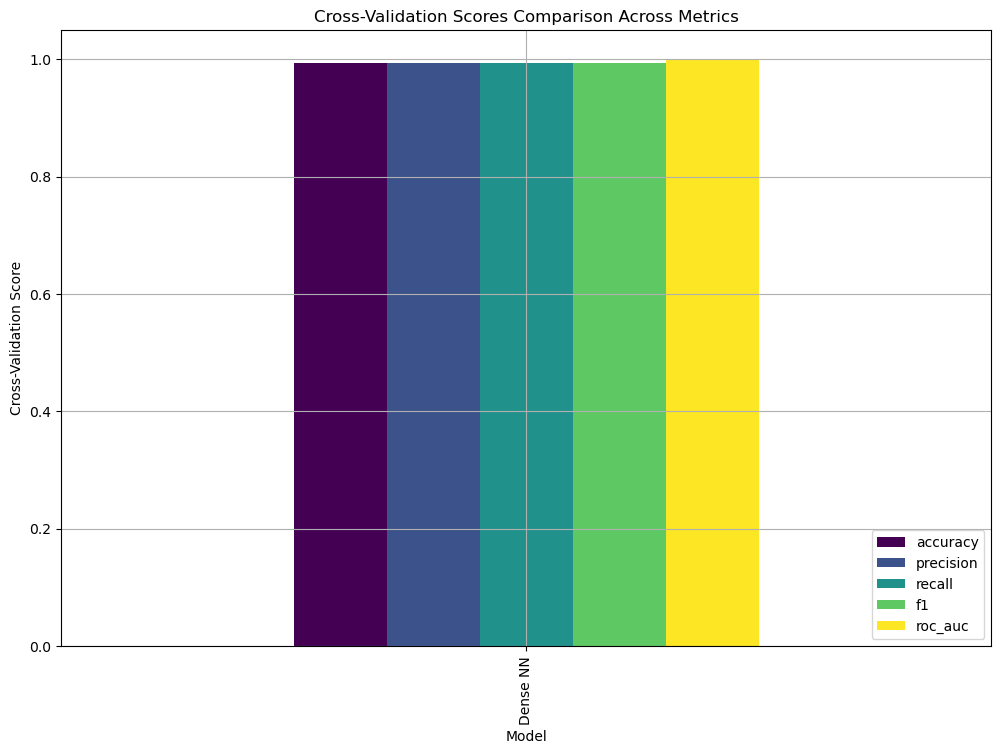

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape images to 1D arrays and normalize
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)), # 28*28 = 784
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Predict on test data
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Evaluation of metrics on test data
metrics_dict = {
    'accuracy': accuracy_score(y_test_classes, y_pred_classes),
    'precision': precision_score(y_test_classes, y_pred_classes, average='macro'),
    'recall': recall_score(y_test_classes, y_pred_classes, average='macro'),
    'f1': f1_score(y_test_classes, y_pred_classes, average='macro'),
    'roc_auc': roc_auc_score(y_test, y_pred, multi_class='ovr')
}

# Conversion of metrics to DataFrame for graphing
test_df = pd.DataFrame([metrics_dict])
test_df['Model'] = 'Dense NN'

# Function for plotting graphs
def plot_metrics(df, metric_type):
    df = df.set_index('Model')
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    df[metrics].plot(kind='bar', figsize=(12, 8), colormap='viridis')
    plt.title(f'{metric_type} Scores Comparison Across Metrics')
    plt.ylabel(f'{metric_type} Score')
    plt.xticks(rotation=90)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Graph for Test Data
plot_metrics(test_df, 'Test')

# For cross-validation
kf = KFold(n_splits=5)
cross_val_metrics = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'roc_auc': []
}

for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model.fit(x_train_fold, y_train_fold, epochs=5, batch_size=128, verbose=0)
    y_val_pred = model.predict(x_val_fold)
    y_val_pred_classes = y_val_pred.argmax(axis=1)
    y_val_fold_classes = y_val_fold.argmax(axis=1)
    
    cross_val_metrics['accuracy'].append(accuracy_score(y_val_fold_classes, y_val_pred_classes))
    cross_val_metrics['precision'].append(precision_score(y_val_fold_classes, y_val_pred_classes, average='macro'))
    cross_val_metrics['recall'].append(recall_score(y_val_fold_classes, y_val_pred_classes, average='macro'))
    cross_val_metrics['f1'].append(f1_score(y_val_fold_classes, y_val_pred_classes, average='macro'))
    cross_val_metrics['roc_auc'].append(roc_auc_score(y_val_fold, y_val_pred, multi_class='ovr'))

# Conversion of metrics to DataFrame for graphing
cross_val_df = pd.DataFrame({
    'Model': 'Dense NN',
    'accuracy': [sum(cross_val_metrics['accuracy']) / len(cross_val_metrics['accuracy'])],
    'precision': [sum(cross_val_metrics['precision']) / len(cross_val_metrics['precision'])],
    'recall': [sum(cross_val_metrics['recall']) / len(cross_val_metrics['recall'])],
    'f1': [sum(cross_val_metrics['f1']) / len(cross_val_metrics['f1'])],
    'roc_auc': [sum(cross_val_metrics['roc_auc']) / len(cross_val_metrics['roc_auc'])]
})

# Graph for Cross-Validation Data
plot_metrics(cross_val_df, 'Cross-Validation')

In [16]:
cross_val_df

,Model,accuracy,precision,recall,f1,roc_auc
0,Dense NN,0.993717,0.99362,0.993676,0.993621,0.999974
